In [101]:

from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import seaborn as sns

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
!jps

20660 NodeManager
21028 DataNode
21221 JobHistoryServer
8790 Jps
20602 ResourceManager
8717 SparkSubmit
20719 NameNode


### Import files from hdfs

-Import the files into hdfs

In [32]:
#Using one day file

Pyspark =spark.read.format("com.databricks.spark.csv")\
        .option("header","true")\
        .option("inferSchema","true")\
        .load("hdfs://localhost:8020/user/htw/pyspark1/2020-01-13.csv")

### Schema

Set the schema - it should refer to the variable names on the webpage from RStudio

In [33]:
# some additional functions


In [34]:
# seting the schema! StructType-command
schema_PySpark = StructType([
    StructField("date", DateType(), True),
    StructField("time", StringType(), True),
    StructField("size", IntegerType(), True),
    StructField("r_version", StringType(), True),
    StructField("r_arch", StringType(), True),
    StructField("r_os", StringType(), True),
    StructField("package", StringType(), True),
    StructField("version", StringType(), True),
    StructField("country", StringType(), True),
    StructField("ip_id", IntegerType(), True)])

In [43]:
#Import the data using the schema

Spark_SQL = spark.read.format("com.databricks.spark.csv")\
            .option("header","true")\
            .option("inferSchema","true")\
            .schema(schema_PySpark)\
            .load("hdfs://localhost:8020/user/htw/pyspark1/2020-01-13.csv")

In [44]:
Spark_SQL.show(5)

+----------+--------+-------+---------+------+----+--------+-------+-------+-----+
|      date|    time|   size|r_version|r_arch|r_os| package|version|country|ip_id|
+----------+--------+-------+---------+------+----+--------+-------+-------+-----+
|2020-01-13|13:32:48| 861839|       NA|    NA|  NA|     zoo|  1.8-7|     US|    1|
|2020-01-13|13:32:39|1132886|       NA|    NA|  NA|      sp|  1.3-2|     US|    2|
|2020-01-13|13:32:32|  84011|       NA|    NA|  NA|lazyeval|  0.2.2|     NL|    3|
|2020-01-13|13:32:35| 143855|       NA|    NA|  NA|  digest| 0.6.23|     NL|    3|
|2020-01-13|13:32:53|1036570|       NA|    NA|  NA|    pROC| 1.15.3|     GB|    4|
+----------+--------+-------+---------+------+----+--------+-------+-------+-----+
only showing top 5 rows



In [45]:
Spark_SQL.count()

4755602

In [46]:
Spark_SQL.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)
 |-- r_version: string (nullable = true)
 |-- r_arch: string (nullable = true)
 |-- r_os: string (nullable = true)
 |-- package: string (nullable = true)
 |-- version: string (nullable = true)
 |-- country: string (nullable = true)
 |-- ip_id: integer (nullable = true)



### Spark SQL
Register the dataset as Spark SQL

In [50]:
Spark_SQL.createOrReplaceTempView("Spark_SQL")

In [52]:
#Use a SELECT statement to print out the first 5 rows
spark.sql("SELECT * FROM Spark_SQL LIMIT 5").show()

+----------+--------+-------+---------+------+----+--------+-------+-------+-----+
|      date|    time|   size|r_version|r_arch|r_os| package|version|country|ip_id|
+----------+--------+-------+---------+------+----+--------+-------+-------+-----+
|2020-01-13|13:32:48| 861839|       NA|    NA|  NA|     zoo|  1.8-7|     US|    1|
|2020-01-13|13:32:39|1132886|       NA|    NA|  NA|      sp|  1.3-2|     US|    2|
|2020-01-13|13:32:32|  84011|       NA|    NA|  NA|lazyeval|  0.2.2|     NL|    3|
|2020-01-13|13:32:35| 143855|       NA|    NA|  NA|  digest| 0.6.23|     NL|    3|
|2020-01-13|13:32:53|1036570|       NA|    NA|  NA|    pROC| 1.15.3|     GB|    4|
+----------+--------+-------+---------+------+----+--------+-------+-------+-----+



In [51]:
Spark_SQL_prep = spark.sql("select date,package from Spark_SQL")

## Data Understanding
Some First command to inspect the file

In [53]:
Spark_SQL

DataFrame[date: date, time: string, size: int, r_version: string, r_arch: string, r_os: string, package: string, version: string, country: string, ip_id: int]

In [54]:
type(Spark_SQL)

pyspark.sql.dataframe.DataFrame

## Data Preparation
Store only required columns in dataframe

In [55]:
#Selecting required columns in dataframe
df = spark.sql("""SELECT date,package,country
             FROM Spark_SQL""").toPandas()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
Py4JNetworkError: Error while receiving
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33129)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 111] Connection refused
ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('E

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:33129)

### TASk3b

In [56]:
#!hdfs dfs -mkdir /user/htw/Task3b

20/02/19 20:30:22 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [57]:
#!hdfs dfs -put /home/htw/Downloads/LoanStats.csv /user/htw/Task3b

20/02/19 20:30:36 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
schema_loanstats = StructType([
    StructField("int_rate", FloatType(), True),
    StructField("loan_amnt", FloatType(), True),
    StructField("term", IntegerType(), True),
    StructField("grade", StringType(), True),
    StructField("home_ownership", StringType(), True),
    StructField("annual_inc", FloatType(), True),
    StructField("purpose", StringType(), True)])

In [5]:
loanstats = spark.read.format("com.databricks.spark.csv")\
            .option("header","true")\
            .option("inferSchema","true")\
            .schema(schema_loanstats)\
            .load("hdfs://localhost:8020/user/htw/Task3b/LoanStats.csv")

In [10]:
loanstats.createOrReplaceTempView("loanstats")

In [11]:
spark.sql("SELECT * FROM loanstats limit 5").show()

+--------+---------+----+-----+--------------+----------+--------------+
|int_rate|loan_amnt|term|grade|home_ownership|annual_inc|       purpose|
+--------+---------+----+-----+--------------+----------+--------------+
|   10.65|   5000.0|  36|    B|          RENT|   24000.0|   credit_card|
|   15.27|   2500.0|  60|    C|          RENT|   30000.0|           car|
|   15.96|   2400.0|  36|    C|          RENT|   12252.0|small_business|
|   13.49|  10000.0|  36|    C|          RENT|   49200.0|         other|
|   12.69|   3000.0|  60|    B|          RENT|   80000.0|         other|
+--------+---------+----+-----+--------------+----------+--------------+



In [12]:
loanstatsDF = spark.sql("SELECT * FROM loanstats").toDF(*loanstats.columns)

In [33]:
loanstatsDF.select("grade").distinct().show()

+-----+
|grade|
+-----+
|    F|
|    E|
|    B|
|    D|
|    C|
|    A|
|    G|
+-----+



In [34]:
loanstatsDF.select("term").distinct().show()

+----+
|term|
+----+
|  60|
|  36|
+----+



In [35]:
loanstatsDF.select("home_ownership").distinct().show()

+--------------+
|home_ownership|
+--------------+
|           OWN|
|          RENT|
|      MORTGAGE|
|         OTHER|
|          NONE|
+--------------+



In [36]:
loanstatsDF.select("purpose").distinct().show()

+------------------+
|           purpose|
+------------------+
|           wedding|
|       educational|
|             other|
|    small_business|
|debt_consolidation|
|       credit_card|
|            moving|
|          vacation|
|  renewable_energy|
|             house|
|               car|
|    major_purchase|
|           medical|
|  home_improvement|
+------------------+



In [16]:
loanstatsDF.summary().show()

+-------+------------------+------------------+------------------+-----+--------------+------------------+-------+
|summary|          int_rate|         loan_amnt|              term|grade|home_ownership|        annual_inc|purpose|
+-------+------------------+------------------+------------------+-----+--------------+------------------+-------+
|  count|             39786|             39786|             39786|39786|         39786|             39786|  39786|
|   mean|12.027873311150412|11231.360277484542|42.448499472176145| null|          null| 68979.06675526076|   null|
| stddev|3.7274664801209787|  7464.54283214276| 10.63878220011493| null|          null|63762.634525903544|   null|
|    min|              5.42|             500.0|                36|    A|      MORTGAGE|            4000.0|    car|
|    25%|              9.25|            5500.0|                36| null|          null|           40452.0|   null|
|    50%|             11.86|           10000.0|                36| null|        

In [73]:
strindex_g = StringIndexer(inputCol="grade", outputCol="grade_e")
indexed_g = strindex_g.fit(loanstatsDF).transform(loanstatsDF)
indexed_g.show(3)

+--------+---------+----+-----+--------------+----------+--------------+-------+
|int_rate|loan_amnt|term|grade|home_ownership|annual_inc|       purpose|grade_e|
+--------+---------+----+-----+--------------+----------+--------------+-------+
|   10.65|   5000.0|  36|    B|          RENT|   24000.0|   credit_card|    0.0|
|   15.27|   2500.0|  60|    C|          RENT|   30000.0|           car|    2.0|
|   15.96|   2400.0|  36|    C|          RENT|   12252.0|small_business|    2.0|
+--------+---------+----+-----+--------------+----------+--------------+-------+
only showing top 3 rows



In [74]:
strindex_gp = StringIndexer(inputCol="purpose", outputCol="purpose_e")
indexed_gp = strindex_gp.fit(indexed_g).transform(indexed_g)
indexed_gp.show(3)

+--------+---------+----+-----+--------------+----------+--------------+-------+---------+
|int_rate|loan_amnt|term|grade|home_ownership|annual_inc|       purpose|grade_e|purpose_e|
+--------+---------+----+-----+--------------+----------+--------------+-------+---------+
|   10.65|   5000.0|  36|    B|          RENT|   24000.0|   credit_card|    0.0|      1.0|
|   15.27|   2500.0|  60|    C|          RENT|   30000.0|           car|    2.0|      6.0|
|   15.96|   2400.0|  36|    C|          RENT|   12252.0|small_business|    2.0|      5.0|
+--------+---------+----+-----+--------------+----------+--------------+-------+---------+
only showing top 3 rows



In [75]:
strindex_gph = StringIndexer(inputCol="home_ownership", outputCol="home_ownership_e")
indexed_gph = strindex_gph.fit(indexed_gp).transform(indexed_gp)
indexed_gph.show(3)

+--------+---------+----+-----+--------------+----------+--------------+-------+---------+----------------+
|int_rate|loan_amnt|term|grade|home_ownership|annual_inc|       purpose|grade_e|purpose_e|home_ownership_e|
+--------+---------+----+-----+--------------+----------+--------------+-------+---------+----------------+
|   10.65|   5000.0|  36|    B|          RENT|   24000.0|   credit_card|    0.0|      1.0|             0.0|
|   15.27|   2500.0|  60|    C|          RENT|   30000.0|           car|    2.0|      6.0|             0.0|
|   15.96|   2400.0|  36|    C|          RENT|   12252.0|small_business|    2.0|      5.0|             0.0|
+--------+---------+----+-----+--------------+----------+--------------+-------+---------+----------------+
only showing top 3 rows



In [76]:
indexed_gph = indexed_gph.drop(*['grade', 'home_ownership', 'purpose'])

In [77]:
indexed_gph.show(3)

+--------+---------+----+----------+-------+---------+----------------+
|int_rate|loan_amnt|term|annual_inc|grade_e|purpose_e|home_ownership_e|
+--------+---------+----+----------+-------+---------+----------------+
|   10.65|   5000.0|  36|   24000.0|    0.0|      1.0|             0.0|
|   15.27|   2500.0|  60|   30000.0|    2.0|      6.0|             0.0|
|   15.96|   2400.0|  36|   12252.0|    2.0|      5.0|             0.0|
+--------+---------+----+----------+-------+---------+----------------+
only showing top 3 rows



In [78]:
encoder = OneHotEncoderEstimator(inputCols=["term"], outputCols=["term_e"])

In [79]:
model_term_egph = encoder.fit(indexed_gph)

In [80]:
encoded_term_egph = model_term_egph.transform(indexed_gph)

In [81]:
encoded_term_egph.show(3)

+--------+---------+----+----------+-------+---------+----------------+---------------+
|int_rate|loan_amnt|term|annual_inc|grade_e|purpose_e|home_ownership_e|         term_e|
+--------+---------+----+----------+-------+---------+----------------+---------------+
|   10.65|   5000.0|  36|   24000.0|    0.0|      1.0|             0.0|(60,[36],[1.0])|
|   15.27|   2500.0|  60|   30000.0|    2.0|      6.0|             0.0|     (60,[],[])|
|   15.96|   2400.0|  36|   12252.0|    2.0|      5.0|             0.0|(60,[36],[1.0])|
+--------+---------+----+----------+-------+---------+----------------+---------------+
only showing top 3 rows



In [82]:
encoded_term_egph = encoded_term_egph.drop(*['term'])

In [84]:
encoded_term_egph.select("term_e").distinct().show()

+---------------+
|         term_e|
+---------------+
|     (60,[],[])|
|(60,[36],[1.0])|
+---------------+



In [88]:
vectorassembler = VectorAssembler(inputCols=['loan_amnt', 'term_e', 'annual_inc', 'grade_e', 
                                             'purpose_e', 'home_ownership_e'], outputCol='features')
vdf = vectorassembler.transform(encoded_term_egph)
vdf = vdf.select(['features', 'int_rate'])
vdf.show(3)

+--------------------+--------+
|            features|int_rate|
+--------------------+--------+
|(65,[0,37,61,63],...|   10.65|
|(65,[0,61,62,63],...|   15.27|
|(65,[0,37,61,62,6...|   15.96|
+--------------------+--------+
only showing top 3 rows



In [89]:
splitted_df = vdf.randomSplit([0.8, 0.2])
train_df = splitted_df[0]
test_df = splitted_df[1]

In [91]:
lr = LinearRegression(featuresCol='features', labelCol='int_rate', 
                      maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)

In [92]:
str(lr_model.coefficients)

'[2.7843813388846156e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.2637466395540053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.61277984466895,0.0,0.0]'

In [93]:
str(lr_model.intercept)

'10.1670061083'

In [94]:
modelSummary = lr_model.summary

In [96]:
modelSummary.rootMeanSquaredError

2.3220793485296007

In [97]:
modelSummary.r2

0.6111432575852145

In [100]:
residuals = modelSummary.residuals.toPandas()

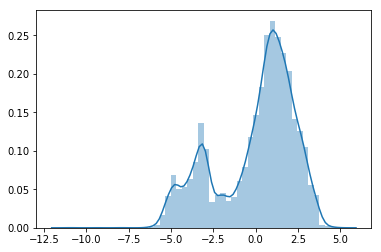

In [102]:
sns.distplot(residuals)